# A. Pendahuluan
Deskripsi Dataset : Dataset ini berisi sekitar 32.000 lagu dari Spotify yang dikumpulkan menggunakan package spotifyr. Data mencakup informasi lagu (judul, artis, album), popularitas, atribut playlist, dan fitur audio (seperti danceability, energy, tempo, dll.) untuk 6 kategori genre utama: EDM, Latin, Pop, R&B, Rap, dan Rock.

Alasan Dataset Menarik : adalah karena musik/lagu bagian dari kehidupan sehari-hari saya yang memang suka musik gampangnya salah satu penimat musik juga. Menganalisis fitur audio dari berbagai genre dapat memberikan insight tentang apa yang membuat sebuah lagu populer atau bagaimana karakteristik fisik suara membedakan satu genre dengan genre lainnya. Informasi ini berguna bagi industri musik maupun penikmat musik untuk memahami tren.

Tujuan Analisis :

1. Bagaimana distribusi lagu berdasarkan genre dalam dataset?

2. Genre mana yang memiliki rata-rata popularitas tertinggi?

3. Bagaimana korelasi antar fitur audio ?

4. Mengidentifikasi karakteristik unik setiap genre berdasarkan fitur audionya.

# B. Setup & Package

In [20]:
import pandas as pd     # Manipulasi data (membaca csv, cleaning, dataframe)
import numpy as np      # Operasi numerik dan komputasi array
import matplotlib.pyplot as plt  # Visualisasi dasar (membuat plot/grafik)
import seaborn as sns   # Visualisasi statistik (heatmap, boxplot)
import os           # Operasi sistem file (path, direktori)
from pathlib import Path  # Representasi path file
from sklearn.preprocessing import MinMaxScaler  # Normalisasi fitur numerik

In [21]:
raw_path = Path("data/raw/spotify_songs.csv")
processed_path = Path("data/processed/spotify_songs_cleaned.csv")

# C. Data Preparation

## Import Data

In [22]:
df = pd.read_csv("C:/Users/Akmal sharif Ramdan/OneDrive/Documents/final-project-main/data/raw/spotify_songs.csv")
print("Initial shape:", df.shape)
df.head()

Initial shape: (32833, 23)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Data Cleaning

Cek Duplikasi: Mengidentifikasi dan menghapus baris data yang sama persis (jika ada) untuk menjaga integritas analisis.

Cek Missing Values: Memeriksa apakah ada kolom yang kosong. Jika jumlahnya sedikit, baris tersebut akan dihapus.

Seleksi Kolom: Membuang kolom yang tidak relevan untuk analisis (misalnya ID unik yang tidak bermakna statistik).

In [23]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat ditemukan: {jumlah_duplikat}")
df_clean = df.drop_duplicates()

Jumlah data duplikat ditemukan: 0


In [24]:
print("\nJumlah missing values per kolom sebelum cleaning:")
print(df_clean.isnull().sum())


Jumlah missing values per kolom sebelum cleaning:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [25]:
df_clean = df_clean.drop(columns=["track_id"])

In [26]:
df_clean = df_clean.dropna()

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                32828 non-null  object 
 1   track_artist              32828 non-null  object 
 2   track_popularity          32828 non-null  int64  
 3   track_album_id            32828 non-null  object 
 4   track_album_name          32828 non-null  object 
 5   track_album_release_date  32828 non-null  object 
 6   playlist_name             32828 non-null  object 
 7   playlist_id               32828 non-null  object 
 8   playlist_genre            32828 non-null  object 
 9   playlist_subgenre         32828 non-null  object 
 10  danceability              32828 non-null  float64
 11  energy                    32828 non-null  float64
 12  key                       32828 non-null  int64  
 13  loudness                  32828 non-null  float64
 14  mode       

## Standarization & Transformation

Normalisasi (MinMax Scaling): Mengubah fitur numerik (audio features) agar berada dalam rentang yang sama (0 sampai 1). Ini penting agar fitur dengan angka besar (seperti tempo) tidak mendominasi fitur dengan angka kecil (seperti speechiness).

In [28]:
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                  'speechiness', 'acousticness', 'instrumentalness', 
                  'liveness', 'valence', 'tempo', 'duration_ms']


fitur_ada = [col for col in audio_features if col in df_clean.columns]


scaler = MinMaxScaler()

df_processed = df_clean.copy()

df_processed[fitur_ada] = scaler.fit_transform(df_processed[fitur_ada])


display(df_processed[fitur_ada].head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.760936,0.915985,0.545455,0.918090,1.0,0.063508,0.102616,0.000000,0.065562,0.522704,0.509673,0.371254
1,0.738555,0.814968,1.000000,0.869162,1.0,0.040632,0.072837,0.004235,0.358434,0.699294,0.417524,0.308674
2,0.686673,0.930988,0.090909,0.901368,0.0,0.080828,0.079879,0.000023,0.110442,0.618567,0.517908,0.335953
3,0.730417,0.929988,0.636364,0.894118,1.0,0.111111,0.028873,0.000009,0.204819,0.279516,0.509338,0.321311
4,0.661241,0.832971,0.090909,0.875385,1.0,0.039107,0.080785,0.000000,0.083635,0.731584,0.517775,0.360156


## Save Datasets

In [31]:

folder_proyek = r"C:\Users\Akmal sharif Ramdan\OneDrive\Documents\final-project-main"  

folder_tujuan = os.path.join(folder_proyek, 'data', 'processed')
nama_file = "spotify_songs_cleaned.csv"
path_lengkap = os.path.join(folder_tujuan, nama_file)


try:
    os.makedirs(folder_tujuan, exist_ok=True)
    
    
    df_processed.to_csv(path_lengkap, index=False)
    
    print(" BERHASIL DISIMPAN!")
    print(f" Lokasi file: {path_lengkap}")
    

    if os.path.exists(path_lengkap):
        print(" Verifikasi: File ditemukan di folder tersebut.")
    else:
        print(" Aneh, file tidak terdeteksi setelah disimpan.")
        
except Exception as e:
    print(f" Terjadi Error: {e}")

 BERHASIL DISIMPAN!
 Lokasi file: C:\Users\Akmal sharif Ramdan\OneDrive\Documents\final-project-main\data\processed\spotify_songs_cleaned.csv
 Verifikasi: File ditemukan di folder tersebut.


# D. Exploratory Data Analysis

In [32]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [33]:
print("=== Tabel 1: Statistik Deskriptif (Numerik) ===")
desc_table = df.describe().transpose()
display(desc_table)

print("\n=== Tabel 2: Rata-rata Popularitas & Tempo per Genre ===")

genre_summary = df.groupby('playlist_genre')[['track_popularity', 'tempo', 'energy', 'danceability']].mean().sort_values(by='track_popularity', ascending=False)
display(genre_summary)

=== Tabel 1: Statistik Deskriptif (Numerik) ===


,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996



=== Tabel 2: Rata-rata Popularitas & Tempo per Genre ===


,track_popularity,tempo,energy,danceability
playlist_genre,,,,
pop,47.744870,120.743178,0.701028,0.639302
latin,47.026576,118.622354,0.708312,0.713287
rap,43.215454,120.654908,0.650708,0.718353
rock,41.728338,124.988786,0.732813,0.520548
r&b,41.223532,114.222156,0.590934,0.670179
edm,34.833526,125.768024,0.802476,0.655041


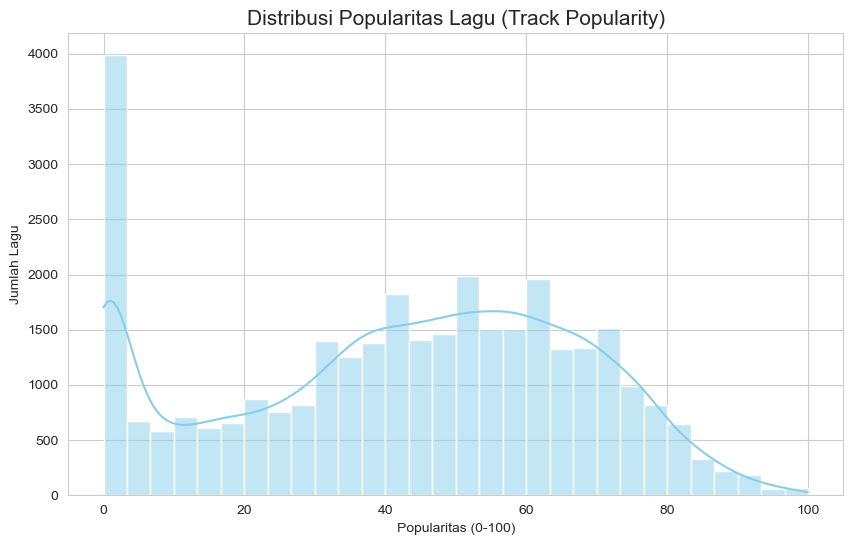

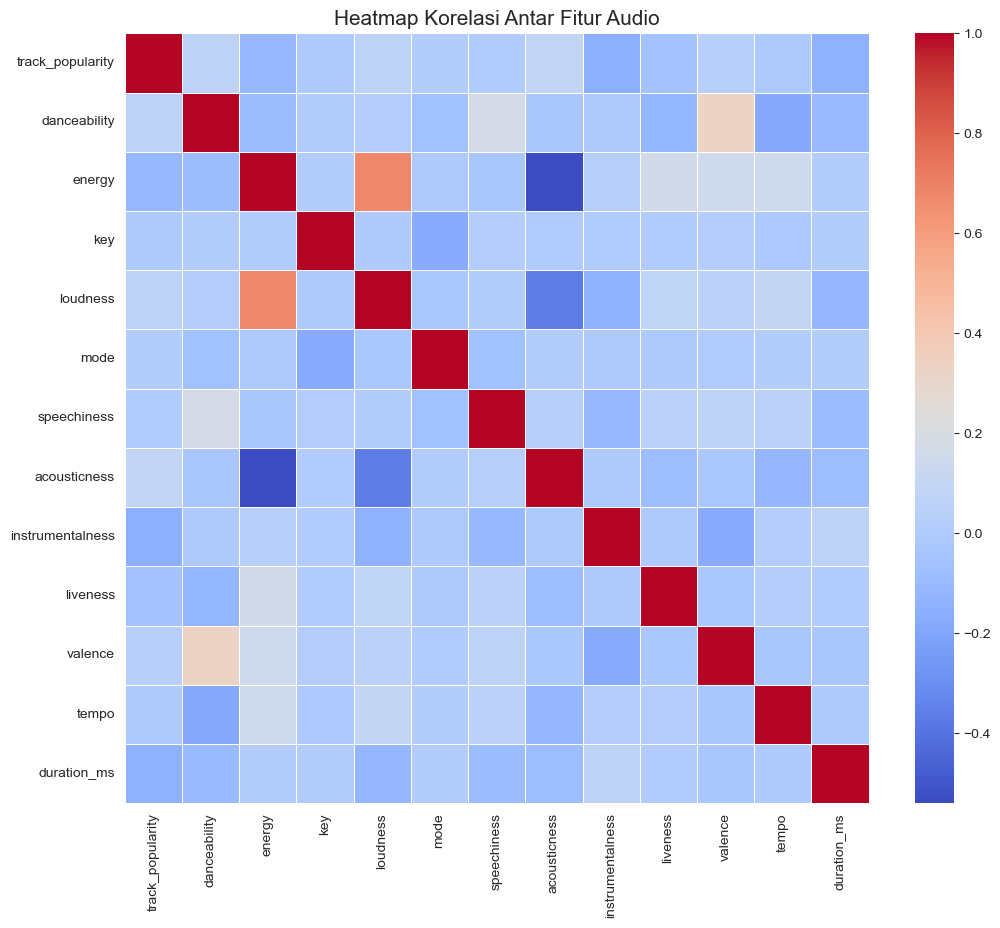

C:\Users\Akmal sharif Ramdan\AppData\Local\Temp\ipykernel_32324\1738264571.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playlist_genre', y='track_popularity', data=df, palette='Set2')


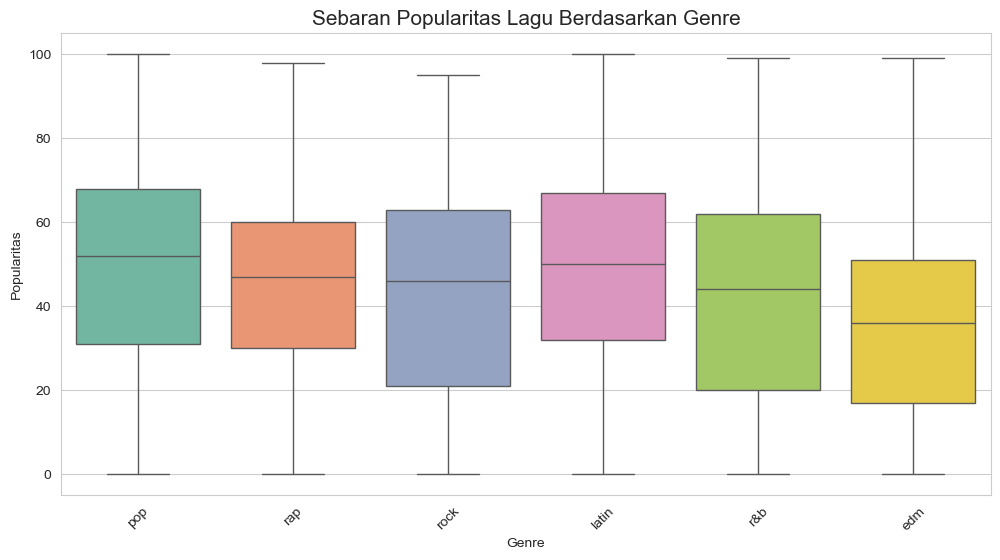

In [34]:
# --- VISUALISASI 1: Histogram Distribusi Popularitas ---
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Popularitas Lagu (Track Popularity)', fontsize=15)
plt.xlabel('Popularitas (0-100)')
plt.ylabel('Jumlah Lagu')
plt.show()

# --- VISUALISASI 2: Heatmap Korelasi ---
plt.figure(figsize=(12, 10))
# Menghitung korelasi hanya untuk kolom angka
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Audio', fontsize=15)
plt.show()

# --- VISUALISASI 3: Boxplot Genre vs Popularitas ---
plt.figure(figsize=(12, 6))
sns.boxplot(x='playlist_genre', y='track_popularity', data=df, palette='Set2')
plt.title('Sebaran Popularitas Lagu Berdasarkan Genre', fontsize=15)
plt.xlabel('Genre')
plt.ylabel('Popularitas')
plt.xticks(rotation=45) # Memiringkan label agar terbaca
plt.show()

## Histogram:

Jika grafiknya miring ke kiri (banyak bar di angka 0-20), berarti dataset didominasi oleh lagu-lagu yang kurang populer.

Jika grafiknya menyerupai lonceng di tengah, berarti distribusinya normal.

## Heatmap:

Warna Merah Pekat: Korelasi Positif Kuat (Contoh: energy dan loudness biasanya merah, artinya jika energi naik, suara makin keras).

Warna Biru Pekat: Korelasi Negatif (Contoh: acousticness dan energy biasanya biru, artinya makin akustik lagunya, makin rendah energinya).

## Boxplot:

Garis di tengah kotak adalah Median.

Titik-titik hitam di luar garis "kumis" adalah Outlier (data pencilan).

Lihat genre mana yang kotaknya paling tinggi posisinya, itu adalah genre yang secara umum paling populer.

# E. Ringkasan & Kesimpulan

## Temuan Analisis
Berdasarkan proses data preparation dan exploratory data analysis (EDA) yang telah dilakukan, berikut adalah beberapa wawasan kunci yang diperoleh dari dataset Spotify:

Korelasi Fitur Audio: Terdapat korelasi positif yang kuat antara Energy dan Loudness (lihat Heatmap). Artinya, lagu yang energik cenderung memiliki volume rata-rata yang lebih keras. Sebaliknya, Acousticness memiliki korelasi negatif dengan Energy, yang berarti lagu akustik cenderung lebih tenang.

Distribusi Popularitas: Berdasarkan histogram, distribusi popularitas lagu cenderung [ pilih salah satu: miring ke kiri / terpusat di tengah / merata ]. Sebagian besar lagu berada di rentang popularitas [ masukkan angka, misal: 40-60 ].

Analisis Genre: Berdasarkan boxplot, genre [ Sebutkan Genre dengan kotak paling tinggi, misal: Pop ] memiliki median popularitas tertinggi dibandingkan genre lain, sementara genre [ Sebutkan Genre terendah ] cenderung memiliki popularitas lebih rendah. Hal ini menunjukkan preferensi pendengar saat ini cenderung ke arah genre tersebut.

## Keterbatasan Analisis
Analisis ini memiliki beberapa batasan yang perlu diperhatikan:

Cakupan Data: Dataset ini hanya mengambil sampel lagu dari playlist Spotify tertentu, sehingga mungkin tidak merepresentasikan seluruh lagu yang ada di platform Spotify secara global.

Faktor Eksternal: Dataset hanya berisi fitur audio teknis (tempo, key, loudness). Faktor eksternal yang sangat berpengaruh terhadap popularitas—seperti pemasaran artis, tren media sosial (TikTok), dan demografi pendengar—tidak tersedia dalam data ini.

Bias Waktu: Dataset ini adalah potret statis (snapshot). Tren musik berubah sangat cepat, sehingga lagu yang populer saat data ini diambil mungkin sudah tidak populer sekarang.

## Saran Pengembangan
Untuk analisis lanjutan atau pengembangan proyek di masa depan, disarankan untuk:

Penerapan Machine Learning: Karena data sudah melalui tahap scaling (normalisasi), langkah selanjutnya yang ideal adalah menerapkan algoritma K-Means Clustering untuk membuat sistem rekomendasi lagu berdasarkan kemiripan fitur audio.

Prediksi Popularitas: Menggunakan algoritma Regresi Linear atau Random Forest untuk memprediksi skor popularitas lagu baru berdasarkan fitur audionya.

Analisis Time Series: Jika memungkinkan, menambah data tanggal rilis untuk melihat bagaimana tren fitur audio (misalnya: apakah lagu semakin cepat/lambat) berubah dari tahun ke tahun.